In [2]:
from PIL import Image

def merge(im1, im2, opacity):
    h = max(im1.size[1], im2.size[1])
    im = Image.new("RGBA", (im1.size[0], h))

    im.paste(im1)
    im.paste(im2, (im1.size[0], opacity))

    return im

def roll(im, delta):
    """Roll an image sideways."""
    xsize, ysize = im.size

    delta = delta % xsize
    if delta == 0:
        return im

    part1 = im.crop((0, 0, delta, ysize))
    part2 = im.crop((delta, 0, xsize, ysize))
    im.paste(part1, (xsize - delta, 0, xsize, ysize))
    im.paste(part2, (0, 0, xsize - delta, ysize))

    return im

def roll_top(im, delta):
    """Roll an image sideways."""
    im = im.transpose(Image.ROTATE_90)
    roll(im, delta)

#     xsize, ysize = im.size

#     delta = delta % ysize
#     if delta == 0:
#         return im

#     part1 = im.crop((0, delta, xsize, ysize))
#     part2 = im.crop((0, 0, xsize, delta))
#     im.paste(part1, (0, ysize - delta, xsize, ysize))
#     im.paste(part2, (0, 0, xsize, ysize - delta))

    return im.transpose(Image.ROTATE_270)


In [36]:
transparent_cat = Image.open("random_images/transparent_cat.jpg")
llama = Image.open("random_images/llama.jpg")
# merge(llama, transparent_cat, 50).show()
llama_rolled = roll(llama, 475).convert("L")#.show()
llama_rolled = roll_top(llama_rolled, 120)
llama_rolled.save("random_images/llama_rolled_xy.jpg")

In [7]:
house = Image.open("./imagenet_images/ILSVRC2012_val_00038221.JPEG")
house90 = house.transpose(Image.ROTATE_90)
house180 = house.transpose(Image.ROTATE_180)
house270 = house.transpose(Image.ROTATE_270)

house.save("random_images/hammer.jpg")
house90.save("random_images/hammer90.jpg")
house180.save("random_images/hammer180.jpg")
house270.save("random_images/hammer270.jpg")

In [44]:
red, green, blue = Image.open("random_images/llama.jpg").split()
zeroed_band = red.point(lambda _: 0)

red_merge = Image.merge("RGB", (red, zeroed_band, zeroed_band)).save("random_images/llama_red.jpg")

green_merge = Image.merge("RGB", (zeroed_band, green, zeroed_band)).save("random_images/llama_green.jpg")

blue_merge = Image.merge("RGB", (zeroed_band, zeroed_band, blue)).save("random_images/llama_blue.jpg")

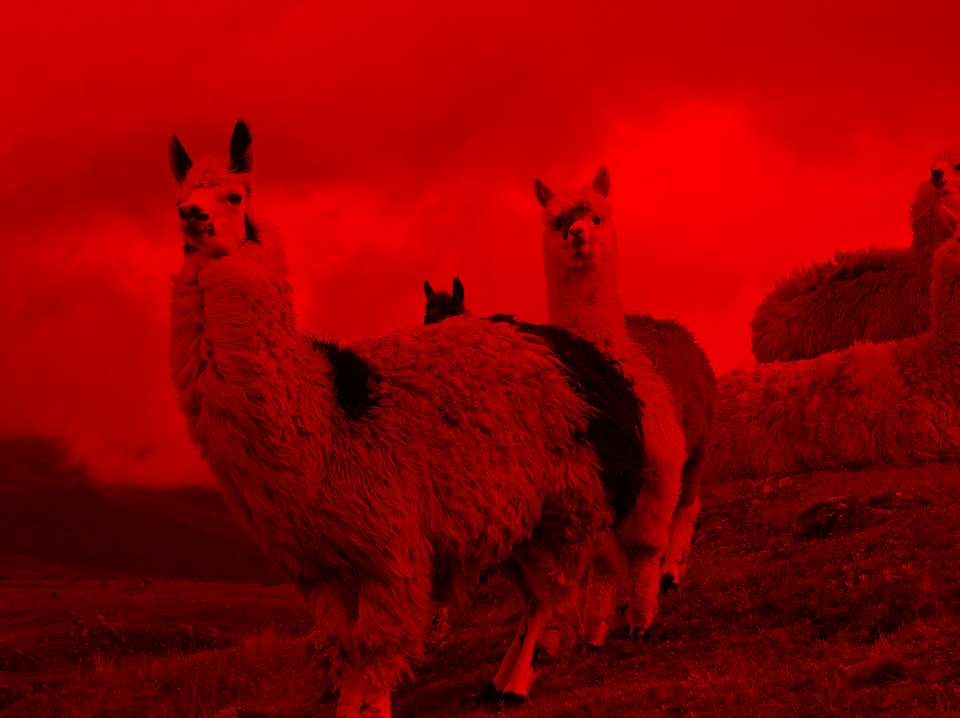

In [43]:
red_merge

In [45]:
https://realpython.com/image-processing-with-the-python-pillow-library/

SyntaxError: invalid syntax (3778767378.py, line 1)